# DataCamp Certification Case Study

### Project Brief

You have been hired by Inn the Neighborhood, an online platform that allows people to rent out their properties for short stays. Currently, the webpage for renters has a conversion rate of 2%. This means that most people leave the platform without signing up. 

The product manager would like to increase this conversion rate. They are interested in developing an application to help people estimate the money they could earn renting out their living space. They hope that this would make people more likely to sign up.

The company has provided you with a dataset that includes details about each property rented, as well as the price charged per night. They want to avoid estimating prices that are more than 25 dollars off of the actual price, as this may discourage people.

You will need to present your findings in two formats:
- You must submit a written report summarising your analysis to your manager. As a data science manager, your manager has a strong technical background and wants to understand what you have done and why. 
- You will then need to share your findings with the product manager in a 10 minute presentation. The product manager has no data science background but is familiar with basic data related terminology. 

The data you will use for this analysis can be accessed here: `"data/rentals.csv"`

# Processing Dataset

### Dataset Information
___
The data set has the following columns:


|Column| Name |Details|
|---|---|---|
|id| Numeric| The unique identification number of the property|
|latitude| Numeric| The latitude of the property|
|longitude| Numeric| The longitude of the property|
|property_type| Character| The type of property (e.g., apartment, house, etc)|
|room_type| Character| The type of room (e.g., private room, entire home, etc)|
|bathrooms| Numeric| The number of bathrooms|
|bedrooms| Numeric| The number of bedrooms|
|minimum_nights| Numeric| The minimum number of nights someone can book|
|price| Character| The dollars per night charged|

## Import Dataset

Load rental.csv dataset to notebook and use id columns as indexer

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(42)

data_rentals = pd.read_csv('data/rentals.csv',index_col='id')
data_rentals.head()

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
id,,,,,,,,
958,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,$170.00
3850,37.75402,-122.45805,House,Private room,1.0,1.0,1,$99.00
5858,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,$235.00
7918,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,$65.00
8142,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,$65.00


## Fix Data Type of Columns

After importing the dataset into the notebook, let's see if the data type is correct or not.

In [ ]:
data_rentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8111 entries, 958 to 39354181
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        8111 non-null   float64
 1   longitude       8111 non-null   float64
 2   property_type   8111 non-null   object 
 3   room_type       8111 non-null   object 
 4   bathrooms       8099 non-null   float64
 5   bedrooms        8107 non-null   float64
 6   minimum_nights  8111 non-null   int64  
 7   price           8111 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 570.3+ KB


from info() and table, price column has object data type which should have integer or float data type.
The price column has dollar units, then the dollar symbol does not need to be included.

##### Convert price column to float and delete '$' symbol

In [ ]:
data_rentals['price']= data_rentals['price'].replace( '[\$,)]','', regex=True ).astype(float)
data_rentals.head()

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
id,,,,,,,,
958,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,170.0
3850,37.75402,-122.45805,House,Private room,1.0,1.0,1,99.0
5858,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,235.0
7918,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,65.0
8142,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,65.0


See the result of change

In [ ]:
data_rentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8111 entries, 958 to 39354181
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        8111 non-null   float64
 1   longitude       8111 non-null   float64
 2   property_type   8111 non-null   object 
 3   room_type       8111 non-null   object 
 4   bathrooms       8099 non-null   float64
 5   bedrooms        8107 non-null   float64
 6   minimum_nights  8111 non-null   int64  
 7   price           8111 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 570.3+ KB


Price column has been fixed

## Dealing with Missing Values

based on .info() method it can be seen that there are missing values in the dataset, namely in the 'bathrooms' and 'bedrooms' columns.

Check how much missing values in dataset for every columns.

In [ ]:
data_rentals.isnull().sum()

latitude           0
longitude          0
property_type      0
room_type          0
bathrooms         12
bedrooms           4
minimum_nights     0
price              0
dtype: int64

There are 12 missing values in the bathrooms column and 4 missing values in the bedrooms column.
Slicing it to check missing values/rows.

In [ ]:
null_slice = pd.isnull(data_rentals['bathrooms']) + pd.isnull(data_rentals['bedrooms'])
null_ds = data_rentals[null_slice].sort_index()
null_ds

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
id,,,,,,,,
144978,37.79336,-122.42506,Apartment,Private room,NaN,1.0,30,56.0
229240,37.79341,-122.40340,Hostel,Shared room,NaN,1.0,1,45.0
259621,37.79470,-122.40374,Hostel,Shared room,NaN,1.0,1,45.0
259622,37.79441,-122.40473,Hostel,Shared room,NaN,1.0,1,45.0
430692,37.75906,-122.40761,Apartment,Private room,NaN,1.0,31,68.0
431862,37.78321,-122.41969,Apartment,Entire home/apt,1.0,NaN,30,124.0
596042,37.79384,-122.42436,Apartment,Private room,NaN,1.0,30,63.0
785901,37.79313,-122.40443,Hostel,Shared room,NaN,1.0,1,45.0
786492,37.79421,-122.40310,Hostel,Shared room,NaN,1.0,1,45.0


Lets check how much missing values on dataset in percentage

In [ ]:
mv_percen = len(null_ds.index)/len(data_rentals.index)*100
print('Missing Values on Dataset : {:.2f} %'.format(mv_percen))

Missing Values on Dataset : 0.20 %


Because the percentage of missing values in the dataset is very low (below 1%). So, we can just remove rows containing missing values.

In [ ]:
data_rentals = data_rentals.dropna()

print(data_rentals.isnull().sum())

latitude          0
longitude         0
property_type     0
room_type         0
bathrooms         0
bedrooms          0
minimum_nights    0
price             0
dtype: int64


Now there are no missing values in the dataset, anymore.

## Cleaning Object Columns of Dataset

The property_type column is in the object data type. Let's check each value in the column for any impurity objects.

In [ ]:
property = pd.DataFrame([
          data_rentals.property_type.value_counts(),
          round(data_rentals.property_type.value_counts(1) * 100, 2)], ).T
property.columns = ['total','percent']
property

,total,percent
Apartment,3234.0,39.95
House,2313.0,28.57
Condominium,892.0,11.02
Guest suite,577.0,7.13
Boutique hotel,267.0,3.30
Hotel,157.0,1.94
Townhouse,142.0,1.75
Serviced apartment,121.0,1.49
Loft,88.0,1.09
Hostel,86.0,1.06


We have so many different values, but not every value has a large amount of contribution.

Values with percentages below 1% must be removed because they can contaminate the dataset.

In [ ]:
drop_property = property[property.percent <1].index

data_rentals = data_rentals[~data_rentals.property_type.isin(drop_property)]
data_rentals.property_type.value_counts()

Apartment             3234
House                 2313
Condominium            892
Guest suite            577
Boutique hotel         267
Hotel                  157
Townhouse              142
Serviced apartment     121
Loft                    88
Hostel                  86
Name: property_type, dtype: int64

Now we check for room_type colums

In [ ]:
room = pd.DataFrame([
       data_rentals.room_type.value_counts(),
       round(data_rentals.room_type.value_counts(1) * 100, 2)], ).T
room.columns = ['total','percent']
room

,total,percent
Entire home/apt,4688.0,59.52
Private room,2785.0,35.36
Shared room,216.0,2.74
Hotel room,188.0,2.39


room_type columns looks good with percentage of every values above 1%, we can keep that without change.

## Labeling Object Columns to Integer

In general, if we want to rent a place, we will consider the type of property and the type of room. So, property type and room type will affect the selection result. But, machine learning can't understand it if the value is declared in string. So we need to change change that.

We will label each property_type and room_type value which is originally a string to be an integer, similar values will be expressed in the same integer.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_rentals['room_type'] = le.fit_transform(data_rentals['room_type'])
data_rentals['property_type'] = le.fit_transform(data_rentals['property_type'])
data_rentals.head()

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
id,,,,,,,,
958,37.76931,-122.43386,0,0,1.0,1.0,1,170.0
3850,37.75402,-122.45805,6,2,1.0,1.0,1,99.0
5858,37.74511,-122.42102,0,0,1.0,2.0,30,235.0
7918,37.76669,-122.45250,0,2,4.0,1.0,32,65.0
8142,37.76487,-122.45183,0,2,4.0,1.0,32,65.0


In [ ]:
print(data_rentals['room_type'].unique())
print(data_rentals['property_type'].unique())

[0 2 3 1]
[0 6 2 9 7 3 4 8 5 1]


Now each value in the property_type and room_type columns is an integer from 0 to 9 and 0 to 3, respectively.

## More Cleaning Dataset
#### Check anomaly value

In the dataset there must be values that are not fair or called anomaly values.

Lets check value anomaly value on dataset.

In [ ]:
data_rentals.describe().astype(int)

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
count,7877,7877,7877,7877,7877,7877,7877,7877
mean,37,-122,2,0,1,1,12711,226
std,0,0,2,1,0,0,1126729,416
min,37,-122,0,0,0,0,1,0
25%,37,-122,0,0,1,1,2,100
50%,37,-122,2,0,1,1,4,151
75%,37,-122,6,2,1,2,30,240
max,37,-122,9,3,14,14,100000000,10000


As we can see, there are so many anomaly values in dataset.
1. bathrooms columns have minimal values is 0 (No bathroom in rental property)
2. bedrooms columns have minimal values is 0 (No bedrooms in rental property)
3. minimum_nihts columns have maximum values is 100000000 (its more like buy permanent, not rental property)
4. price columns have minimal values is 0 (free rental property)
5. price columns have maximal values is 10000 (too expensive rental property/night)

Anomalies 1, 2, 3, and 5 must be removed because we cannot rent out properties that have only bedrooms or only bathrooms or without both, we cannot allow property purchases on rental applications, and too expensive price will be bad for machine learning. For number 4, we can allow that. But lets check how much the price, bathrooms, bedrooms can we take.

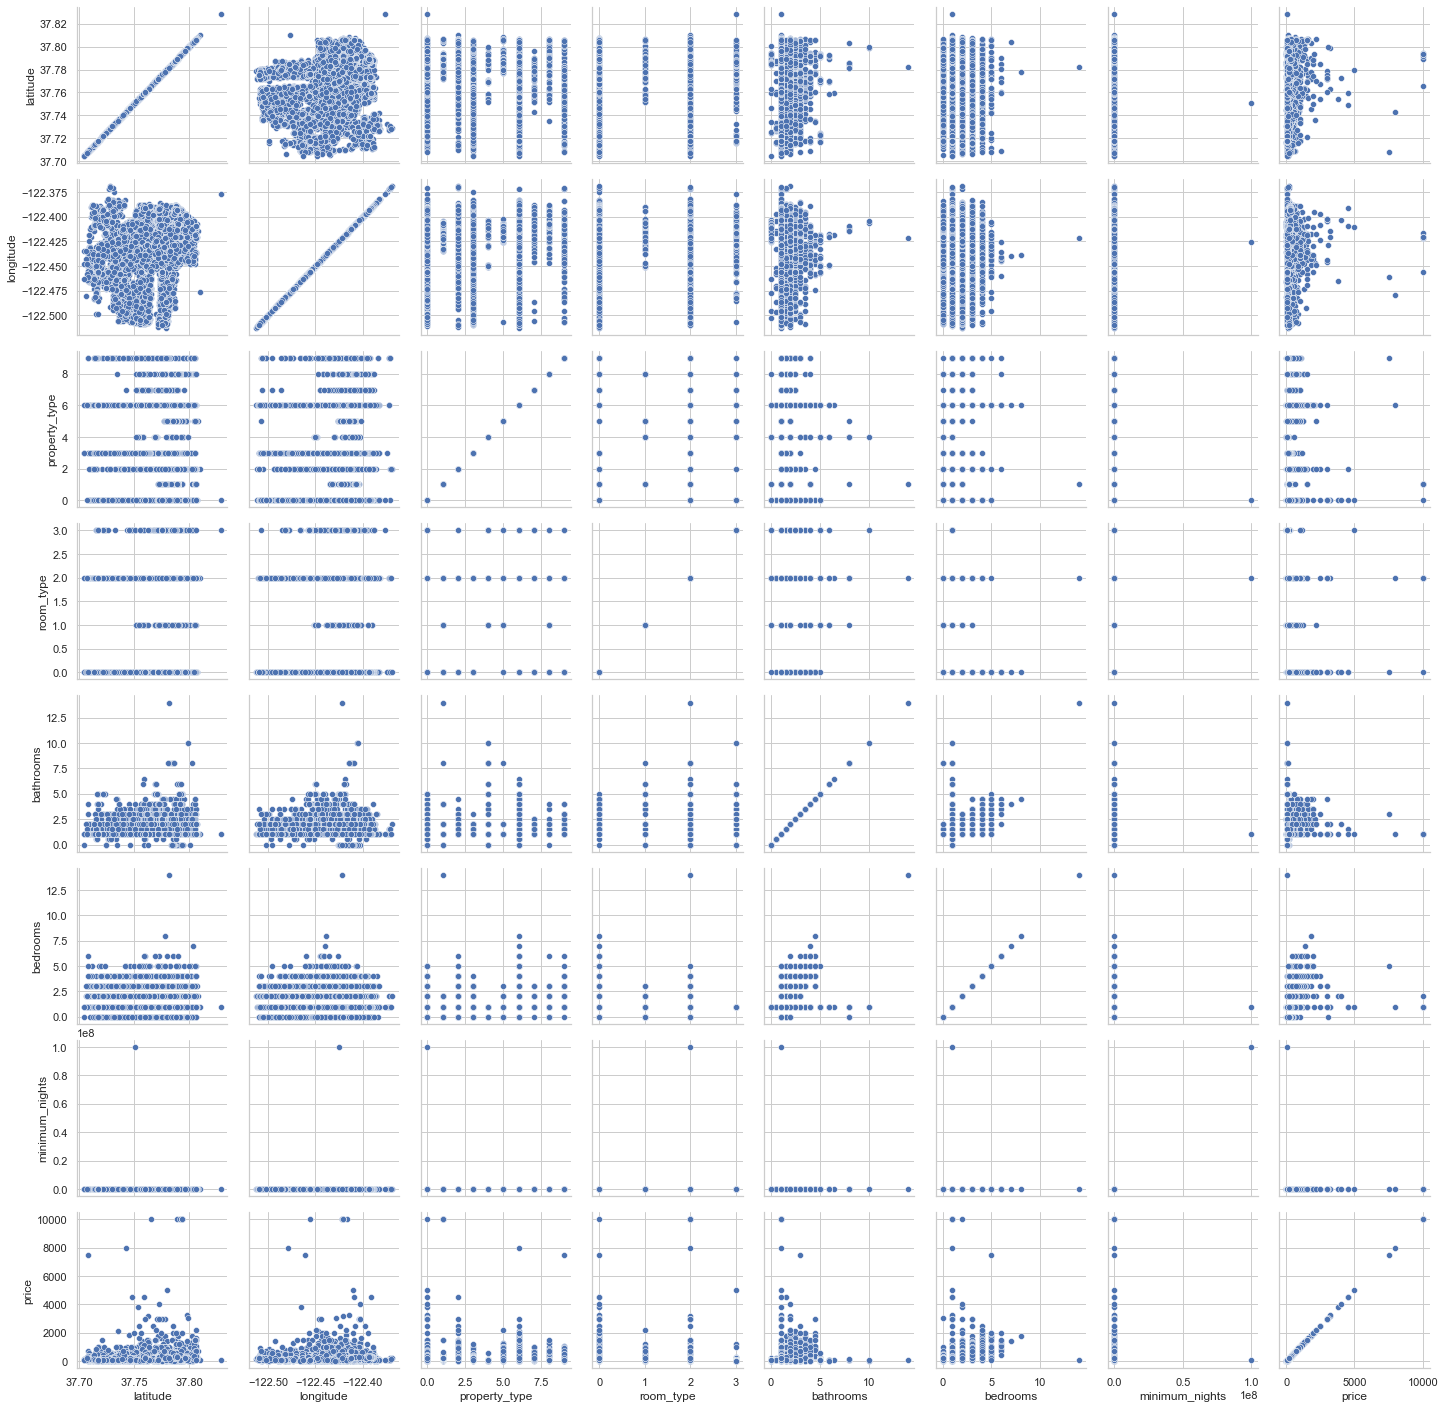

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.PairGrid(data_rentals)
g.map(sns.scatterplot)

We can take price rent < $2000, bedrooms <= bathrooms+2 (general), for better correlation.
From the graph the latitude maximum is anomaly too, we will remove that.

In [ ]:
#first, we eliminate by price
data_rentals_clean = data_rentals.drop(data_rentals[data_rentals.price > 2000].index)

#eliminate by other anomaly
error = data_rentals_clean[(data_rentals_clean.bathrooms >= data_rentals_clean.bedrooms+2) |
                                (data_rentals_clean.bathrooms == data_rentals_clean.bedrooms.max()) |
                                (data_rentals_clean.latitude == data_rentals_clean.latitude.max()) |
                                (data_rentals_clean.bedrooms < 1) |(data_rentals_clean.bathrooms < 1) ]
data_rentals_clean = data_rentals_clean.drop(error.index)

#last, eliminate by minimum_nights
data_rentals_clean = data_rentals_clean.drop(data_rentals_clean[data_rentals_clean.minimum_nights > 200].index)

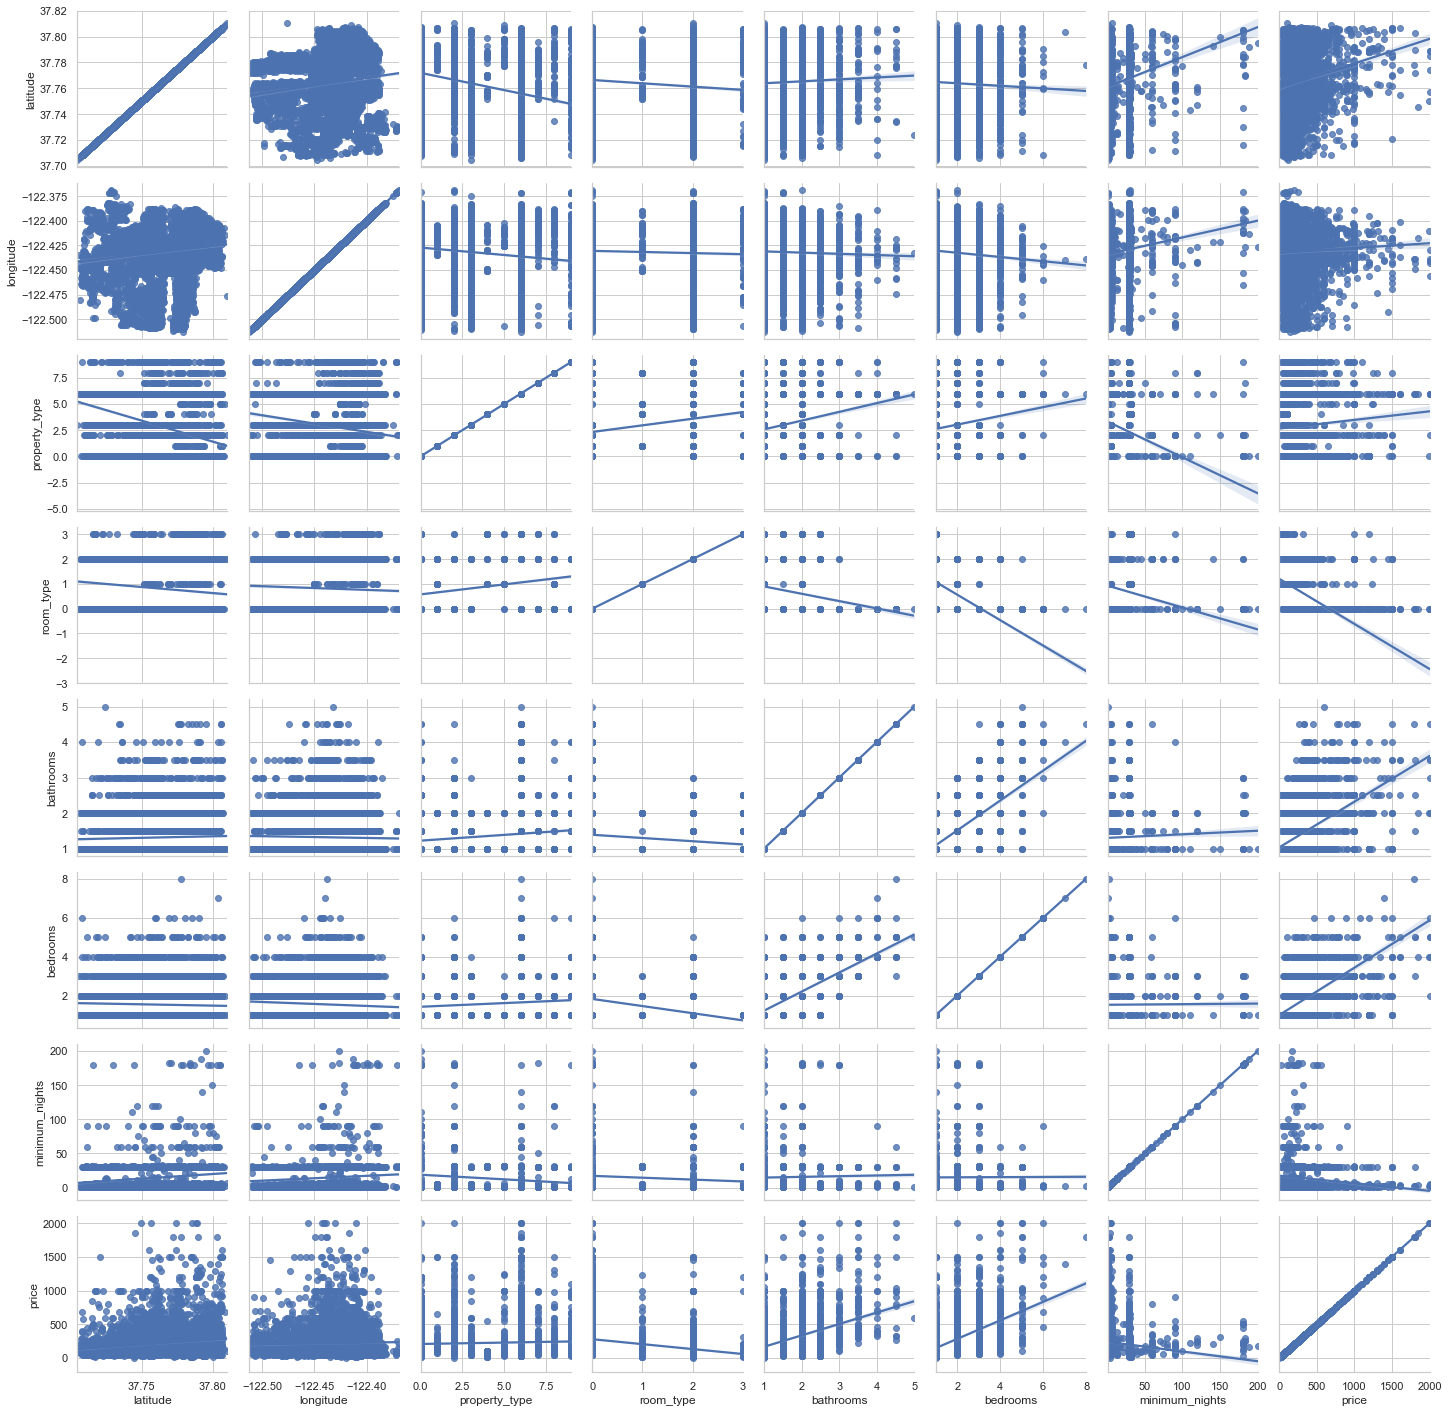

In [ ]:
g = sns.PairGrid(data_rentals_clean)
g.map(sns.regplot)

Now, the dataset is cleaner than ever. The data is spread out in fairly good condition.

## Rent Location Visualization

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(data_rentals_clean,
                        lat='latitude',
                        lon='longitude',
                        color='price',
                        color_continuous_scale=["green", 'blue', 'red'],
                        zoom=11.5,
                        range_color=[0, data_rentals_clean['price'].quantile(0.95)],
                        height=700,
                        title='Rentals location',
                        opacity=.5,
                        center={
                            'lat': data_rentals_clean.latitude.mode()[0],
                            'lon': data_rentals_clean.longitude.mode()[0]})
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r": 0, "l": 0, "b": 0})
fig.show()

## Data Engineering

Apart from the facility, another thing that can affect the rental price is the rental location.
#### Like, "How far from the downtown?".

Becaus dataset location is in latitude and longitude. we need calculetes the position from referent point to target point (downton). Here we use function from [this link](https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula) to calculate distance in kilometere.

In [ ]:
def distance_(df, lat, long):
    """
    +++ Helper Function +++
    Takes a DataFrame conatining lat and long values and calculates distance in miles (rounded to two decimal 	  place) from San Francisco downtown.
    San Francisco downtown latitude = 37.7946, longitude = -122.3999
    """
    def Distance(lat1, lons1, lat2, lons2):
        """
        Calculates distance in kilometere between two places given lattitude and longitude with consideration 			of earths curvature.

        Parameters:
        ===========
        lat1  = float or int. coordinate of location 1.  
        lons1 = float or int. coordinate of location 1.
        lat2  = float or int. coordinate of location 2. 
        lons2 = float or int. coordinate of location 2. 

        Source:
        https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-			haversine-formula
        """
        import math
        a = 6378.137  #equitorial radius in km
        b = 6356.752  #polar radius in km
        lat1 = math.radians(lat1)
        lons1 = math.radians(lons1)
        R = (((((a**2) * math.cos(lat1))**2) +
              (((b**2) * math.sin(lat1))**2)) /
             ((a * math.cos(lat1))**2 +
              (b * math.sin(lat1))**2))**0.5  #radius of earth at lat1
        x1 = R * math.cos(lat1) * math.cos(lons1)
        y1 = R * math.cos(lat1) * math.sin(lons1)
        z1 = R * math.sin(lat1)

        lat2 = math.radians(lat2)
        lons2 = math.radians(lons2)
        R = (((((a**2) * math.cos(lat2))**2) +
              (((b**2) * math.sin(lat2))**2)) /
             ((a * math.cos(lat2))**2 +
              (b * math.sin(lat2))**2))**0.5  #radius of earth at lat2
        x2 = R * math.cos(lat2) * math.cos(lons2)
        y2 = R * math.cos(lat2) * math.sin(lons2)
        z2 = R * math.sin(lat2)

        return ((x1 - x2)**2 + (y1 - y2)**2 +
                (z1 - z2)**2)**0.5  # * 0.621371 for mile

    p = df[lat].to_list()
    k = df[long].to_list()
    temp_list = []
    for x in zip(p, k):
        z = {
            'distance_from_downtown_mile':
            round(Distance(x[0], x[1], 37.7946, -122.3999) * 0.621371, 2)
        }
        temp_list.append(z)
    df_ = pd.DataFrame(temp_list)
    return df_

Use the function and store result on dataset.

In [ ]:
df_distace = distance_(data_rentals_clean, 'latitude', 'longitude')
data_rentals_clean['distance'] = df_distace['distance_from_downtown_mile'].values

price = data_rentals_clean.pop('price')
data_rentals_clean.insert(8,'price',price)

Lets see again graph of dataset after new distance column.

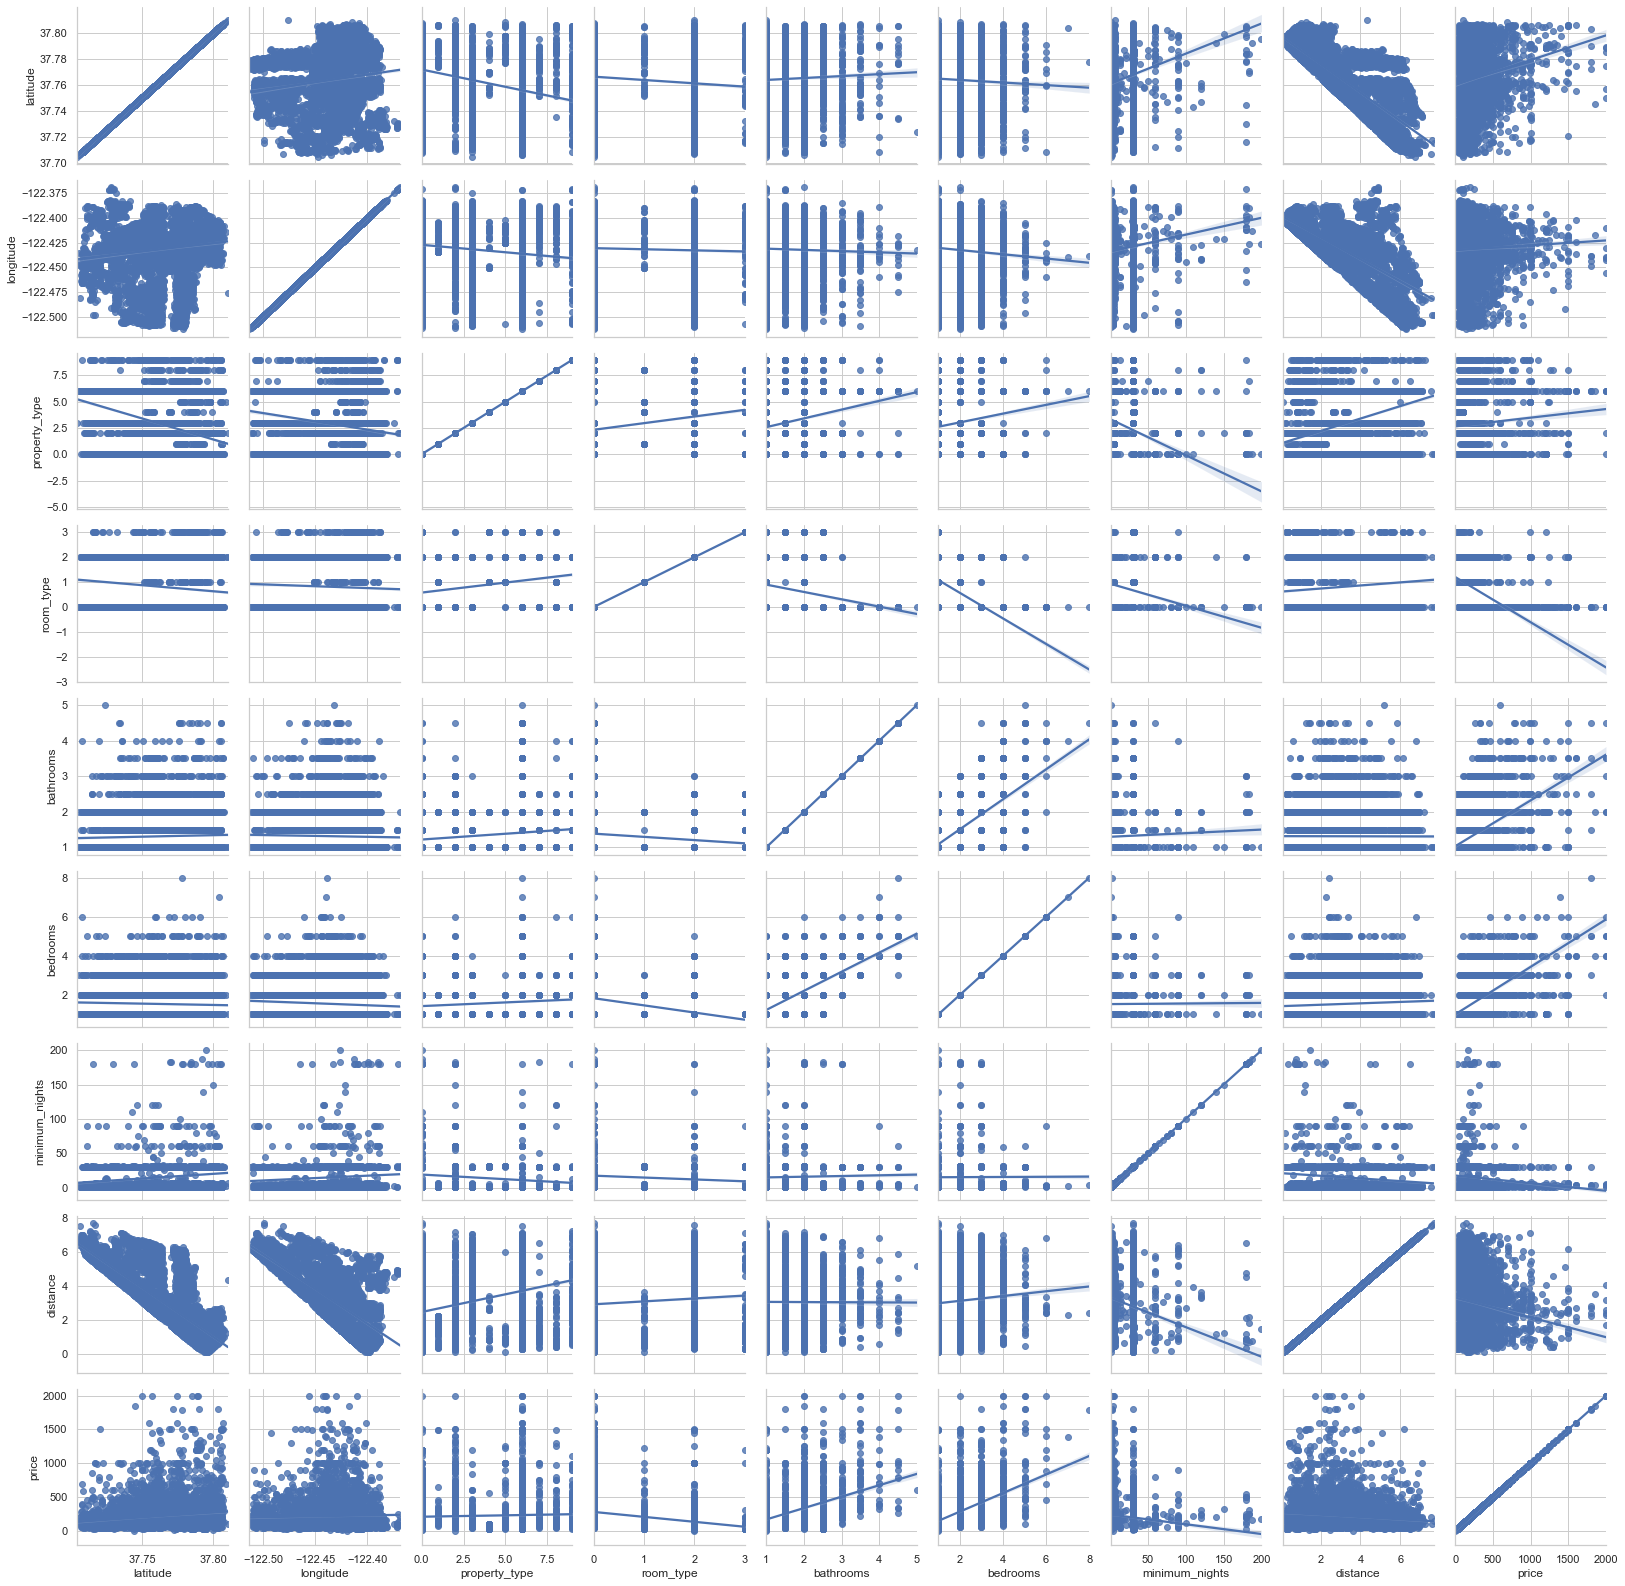

In [ ]:
g = sns.PairGrid(data_rentals_clean)
g.map(sns.regplot)

Now we see heatmap of dataset correlation.

<AxesSubplot:>

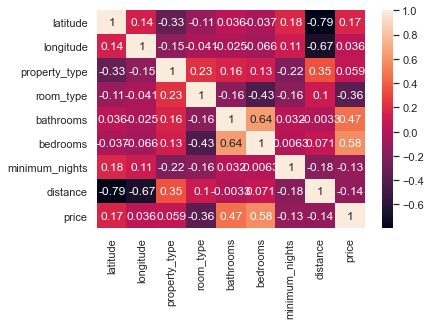

In [ ]:
sns.heatmap(data_rentals_clean.corr(),annot=True)

Now we see that the distance column is negatively correlated with the price column, which means that the smaller the distance between the rental locations from the city center, the higher the rental price.

# Machine Learning Model

Slicing features (X) and target (y) of the cleaned dataset.

In [ ]:
X = data_rentals_clean.drop(columns='price')
y = data_rentals_clean['price']

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)

Spliting dataset for train and test set, with test size 20% and random state 50.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

Create a model with several kinds of algorithms

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

def models(x):
    model = x
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    algoname= x.__class__.__name__
    return algoname, round(r2_score(y_test, y_pred),3), round(mean_absolute_error(y_test, y_pred),2), round(np.sqrt(mean_squared_error(y_test, y_pred)),2)

algo=[GradientBoostingRegressor(),
      RandomForestRegressor(),
      DecisionTreeRegressor(),
      LinearRegression(),
      Ridge(),
      Lasso()]

score=[]
for a in algo:
    score.append(models(a))

 #Collate all scores in a table
pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE']).sort_values(by=['Score'],ascending=False)

,Model,Score,MAE,RMSE
1,RandomForestRegressor,0.575,72.24,132.62
0,GradientBoostingRegressor,0.570,73.16,133.41
3,LinearRegression,0.445,84.19,151.52
4,Ridge,0.445,84.19,151.51
5,Lasso,0.445,83.69,151.59
2,DecisionTreeRegressor,0.225,91.96,179.02


As we can see, RandomForestRegressor have the best score. Now, we will optimized that with some parameters.

### Best Model

In [ ]:
rf = RandomForestRegressor(n_estimators=300,
                          criterion='squared_error',
                          min_samples_split=2,
                          min_samples_leaf=1,
                          max_features='sqrt',
                          max_depth=50,
                          n_jobs=-1,
                          random_state=30)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [ ]:
def model_stat(y_test, y_pred):
    print(' MAE:', mean_absolute_error(y_test, y_pred), '\n', 'MSE:',
          mean_squared_error(y_test, y_pred), '\n', 'RMSE:',
          np.sqrt(mean_squared_error(y_test, y_pred)), '\n', 'r2:',
          r2_score(y_test, y_pred))

model_stat(y_test,y_pred)

 MAE: 69.23257527014765 
 MSE: 15659.533721291027 
 RMSE: 125.13805864440693 
 r2: 0.6215046708380347


Now we have more better score, 62,2% accuration.

## EDA Plot

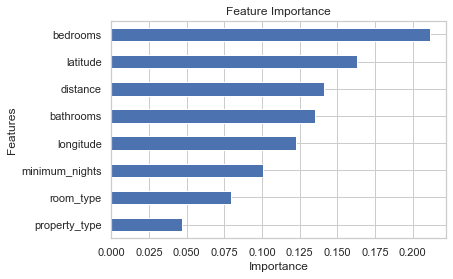

In [ ]:
rf_feat_imp = pd.DataFrame(rf.feature_importances_, index=data_rentals_clean.drop(columns='price').columns)
rf_feat_imp.sort_values(by=0).plot(kind='barh', legend='', title='Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.show()

Now we know that bedroom, location (latitude, longitude, and distance), and bathroom are the top 3 important things that can affect rental prices.

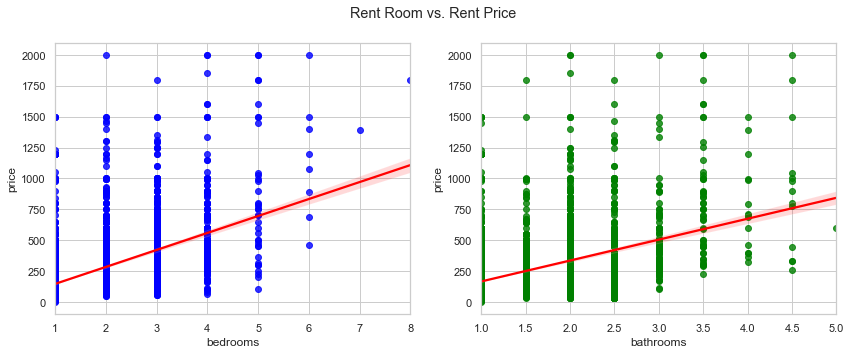

In [ ]:
fig, axes = plt.subplots(1, 2,figsize=(14, 5))
sns.regplot(ax=axes[0],x='bedrooms', y='price',data=data_rentals_clean,
           scatter_kws={'color': 'blue'},
           line_kws={'color': 'red'})
sns.regplot(ax=axes[1],x='bathrooms', y='price',data=data_rentals_clean,
           scatter_kws={'color': 'green'},
           line_kws={'color': 'red'})
fig.suptitle('Rent Room vs. Rent Price')
fig.show()

More rooms, more high price rent.

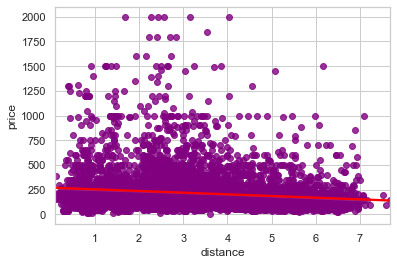

In [ ]:
sns.regplot(x='distance', y='price',data=data_rentals_clean,
           scatter_kws={'color': 'purple'},
           line_kws={'color': 'red'})
plt.title('Distance vs Price')
plt.show()

Distance is not always impact to rent price. but is good too know right?

More distance, more cheap rent price.

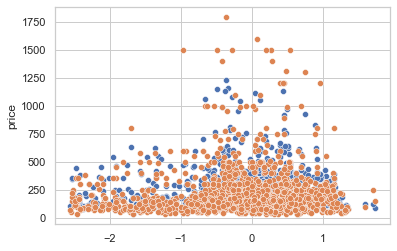

In [ ]:
sns.scatterplot(x=X_test[:,1], y=y_pred)
sns.scatterplot(x=X_test[:,1], y=y_test)
plt.show()

Distribution of the actual rent prices and predicted rent prices.